In [1]:
import pandas as pd
import numpy as np


from sklearn import preprocessing as prep
from sklearn.preprocessing import binarize
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error

import plotly.graph_objects as go
import plotly.express as px

import seaborn as sns
import matplotlib.pyplot as plt
import kaleido

# SystemAdministrators

In [2]:
dfSA = pd.read_csv('SystemAdministrators.csv') # Read the data
dfSA.info() # Obeserve wehter there is missing values in our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Experience      75 non-null     float64
 1   Training        75 non-null     int64  
 2   Completed task  75 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.9+ KB


* **</p>There is no any missing values in our data<p>** 

In [3]:
dfSA = pd.get_dummies(dfSA).drop(['Completed task_No'],axis=1) # Convert variable Completed task to binary variable.

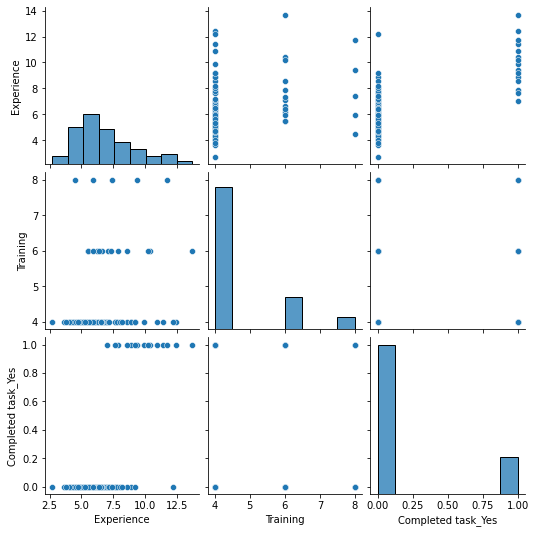

In [4]:
sns.pairplot(dfSA[['Experience','Training','Completed task_Yes']]) # Plot

* **</p>Variable Training contains only three unique values.<p>** 
* **</p>Variable Experience seems to be a right-skewed distribution.<p>** 
* **</p>By observing variable Completed task_Yes, we can find this data imbalanced.<p>**

## Question 1.

In [5]:
dfSA.corr() # Obeserve the correlation coefficient

,Experience,Training,Completed task_Yes
Experience,1.000000,0.227849,0.696647
Training,0.227849,1.000000,0.192685
Completed task_Yes,0.696647,0.192685,1.000000


### partA
#### Choose which variables to include in your model and be sure to provide some explanation regarding that choice. In other words, tell me why you are choosing certain variables to be included in your model.

* **</p>As shown in the correlation coefficient table, Experience has a greater correlation coefficient with Completed, so we choose this variable to be included in my model.<p>**

In [6]:
# Split Data
predictors = ['Experience']
X = dfSA[predictors] 
y = dfSA['Completed task_Yes'] 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=1089)

In [7]:
# Normalize Data
X_train_means = X_train.mean()
X_train_std = X_train.std()

X_train = (X_train - X_train_means)/X_train_std
X_test = (X_test - X_train_means)/X_train_std

In [8]:
# Run LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [9]:
# Store predicted probability for Completed task_Yes = 1
y_pred_prob = log_reg.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = log_reg.predict(X_test)


In [10]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []

# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(2)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(2)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(2)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(2)
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)

# Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.0,1.00,0.0,0.36,0.22
1,0.1,1.0,0.33,0.0,0.62,0.74
2,0.2,1.0,0.17,0.0,0.77,0.87
3,0.3,1.0,0.11,0.0,0.83,0.91
4,0.4,0.6,0.06,0.4,0.67,0.87
5,0.5,0.4,0.00,0.6,0.57,0.87
6,0.6,0.4,0.00,0.6,0.57,0.87
7,0.7,0.2,0.00,0.8,0.33,0.83
8,0.8,0.2,0.00,0.8,0.33,0.83
9,0.9,0.0,0.00,1.0,0.00,0.78


### partB
#### choose a classification threshold and explain your choice.

* **</p>As shown in the table above, I will choose 0.3 as my threshold because F1_Score at 0.3 is greater than others. Also, when we face imbalanced data, F1 score is a better choice to evaluate our model.<p>**

### partC
#### Explanations for a. and b. above should include discussion of some specific performance measures. What performance measures are you using and why?

* **</p>I will choose F1-Score as my performance measure because it is the combination of Recall and Precision, which means it can reflect whether our model can correctly identify positive cases and negative cases. <p>**
* **</p>If we use Recall<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use FPR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the positive cases.</font>
* **</p>If we use FNR<p>** 
><font color='blue'>We will not able to understand whether our model can correctly identify the negative cases.</font>
* **</p>If we use Accuracy<p>** 
><font color='blue'>In this case, we still can get a good performance even if our model is not able to identify the negative cases because there are too few cases in negative.</font>

In [11]:
y_pred_class_lr = binarize([y_pred_prob],threshold=0.3)[0]

# Create Metrics
confusion_lr = metrics.confusion_matrix(y_test, y_pred_class_lr)
recall_value_lr = metrics.recall_score(y_test, y_pred_class_lr).round(3)
fpr_value_lr = (confusion_lr[0,1] / (confusion_lr[0,1] + confusion_lr[0,0]) ).round(2)
fnr_value_lr = (confusion_lr[1,0] / (confusion_lr[1,0] + confusion_lr[1,1]) ).round(2)
f1_value_lr = metrics.f1_score(y_test, y_pred_class_lr).round(2)
accuracy_value_lr = metrics.accuracy_score(y_test, y_pred_class_lr).round(2)  

## Question 2.

In [12]:
# kNN
# Train a classifier for different values of k
results = []
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    confusion = metrics.confusion_matrix(y_test,y_pred_class)
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,knn.predict(X_test)),
                    'fnr':(confusion[1,0] / (confusion[1,0] + confusion[1,1])).round(3),
                    'f1_value':metrics.f1_score(y_test, y_pred_class).round(3),
                    'recall_value': metrics.recall_score(y_test, y_pred_class).round(3),
                    'precision_score': metrics.precision_score(y_test, y_pred_class).round(3)
                   })

# Convert results to Pandas dataframe
results = pd.DataFrame(results)
results

/Users/kuan-chih/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,k,accuracy,fnr,f1_value,recall_value,precision_score
0,1,0.826087,0.2,0.667,0.8,0.571
1,2,0.869565,0.6,0.571,0.4,1.000
2,3,0.826087,0.4,0.600,0.6,0.600
3,4,0.869565,0.4,0.667,0.6,0.750
4,5,0.869565,0.4,0.667,0.6,0.750
5,6,0.869565,0.6,0.571,0.4,1.000
6,7,0.869565,0.4,0.667,0.6,0.750
7,8,0.913043,0.4,0.750,0.6,1.000
8,9,0.869565,0.2,0.727,0.8,0.667
9,10,0.869565,0.4,0.667,0.6,0.750


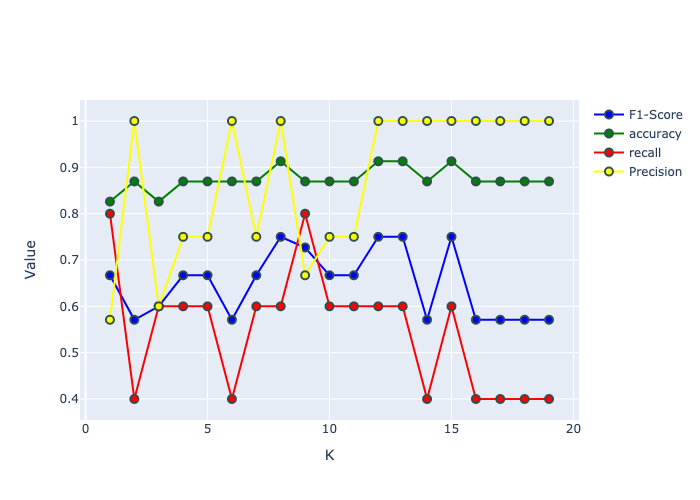

In [13]:
# Create Plot to observe different performance at different k
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['f1_value'],
                         mode='lines+markers',
                         name='F1-Score',
                         marker=dict(size=8,
                                     color='blue',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))
fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['accuracy'],
                         mode='lines+markers',
                         name='accuracy',
                         marker=dict(size=8,
                                     color='green',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['recall_value'],
                         mode='lines+markers',
                         name='recall',
                         marker=dict(size=8,
                                     color='red',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

fig.add_trace(go.Scatter(x=list(range(1,20)), 
                         y=results['precision_score'],
                         mode='lines+markers',
                         name='Precision',
                         marker=dict(size=8,
                                     color='yellow',
                                     symbol='circle',
                                     line=dict(width=2,
                                               color='DarkSlateGrey'))))

# Edit the layout
fig.update_layout(
                   xaxis_title='K',
                   yaxis_title='Value')


fig.show('png')

### partA
#### Choose k, the number of neighbors to use in your classification. Why did you select that value?

* **</p>As shown in the plot above, when k is 15, F1-Score, accuracy, recall and precision are all high. Although the highest recall occurs when k is euqal to 15, however, other performance metrics are too low, so I will choose 15 as my k number. <p>**


### partB
#### You may choose to adjust your classification rule. Remember, by default, the rule is “majority rule.”  If we want a probability threshold that is different than 50%, you will have to use the “predict_proba()” function to compute class prediction probabilities and then feed those probabilities into the “binarize()” function to get class assignments based on a different probability threshold.



In [14]:
# k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [15]:
# Store predicted probability 
y_pred_prob = knn.predict_proba(X_test)[:,1]

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [16]:
# Create list of values for loop to iterate over
threshold = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

# Create empty lists to store metric values created within loop
recall = []
FPR = []
FNR = []
F1 = []
Accuracy = []


# Start loop
for i in threshold:
    
    # Create class assignments given threshold value
    y_pred_class = binarize([y_pred_prob],threshold=i)[0]
    
    # Create Metrics
    confusion = metrics.confusion_matrix(y_test, y_pred_class)
    recall_value = metrics.recall_score(y_test, y_pred_class).round(3)
    fpr_value = (confusion[0,1] / (confusion[0,1] + confusion[0,0]) ).round(3)
    fnr_value = (confusion[1,0] / (confusion[1,0] + confusion[1,1]) ).round(3)
    f1_value = metrics.f1_score(y_test, y_pred_class).round(3)
    accuracy_value = metrics.accuracy_score(y_test, y_pred_class).round(3)
    
    
    
    # Append lists
    recall.append(recall_value)
    FPR.append(fpr_value)
    FNR.append(fnr_value)
    F1.append(f1_value)
    Accuracy.append(accuracy_value)
  

    # Create dataframe
result = pd.DataFrame({"threshold":threshold,
                       "recall":recall,
                       "FPR":FPR,
                       "FNR":FNR,
                       "F1_Score": F1,
                       "Accuracy": Accuracy
                      })

# Show result
result

,threshold,recall,FPR,FNR,F1_Score,Accuracy
0,0.0,1.0,0.333,0.0,0.625,0.739
1,0.1,1.0,0.278,0.0,0.667,0.783
2,0.2,1.0,0.111,0.0,0.833,0.913
3,0.3,1.0,0.111,0.0,0.833,0.913
4,0.4,0.6,0.056,0.4,0.667,0.870
5,0.5,0.6,0.000,0.4,0.750,0.913
6,0.6,0.0,0.000,1.0,0.000,0.783
7,0.7,0.0,0.000,1.0,0.000,0.783
8,0.8,0.0,0.000,1.0,0.000,0.783
9,0.9,0.0,0.000,1.0,0.000,0.783


### partC 
#### In making your decisions regarding “k” and “majority rule”, be sure to discuss your goals (performance measures of interest).

* **</p>As shown in the table in part A, when k is 15, F1-Score, accuracy, recall and precision are all high, so we choose 15 as our number. In part B, we are able to know when threshold is 0.3 or 0.2, except FPR, all performance metrics are the best, so we choose it as our threshold. Because F1-score is the weighted average of Precision and Recall, it can take both False positive and False negative into account, so our goal is to select the value that can give us the highest F1-score. <p>**

In [17]:
knn = KNeighborsClassifier(n_neighbors=15)
y_pred_class = binarize([y_pred_prob],threshold=0.2)[0]
# Create Metrics
confusion_knn = metrics.confusion_matrix(y_test, y_pred_class)
recall_value_knn = metrics.recall_score(y_test, y_pred_class).round(3)
fpr_value_knn = (confusion_knn[0,1] / (confusion_knn[0,1] + confusion_knn[0,0]) ).round(2)
fnr_value_knn = (confusion_knn[1,0] / (confusion_knn[1,0] + confusion_knn[1,1]) ).round(2)
f1_value_knn = metrics.f1_score(y_test, y_pred_class).round(2)
accuracy_value_knn = metrics.accuracy_score(y_test, y_pred_class).round(2)

## Question 3.

In [18]:
report=pd.DataFrame({'Method':['LogReg','kNN'],
                     'Recall':[recall_value_lr,recall_value_knn],
                     'FPR':[fpr_value_lr,fpr_value_knn],
                     'FNR':[fnr_value_lr,fnr_value_knn],
                     'FI':[f1_value_lr,f1_value_knn],
                     'Accuracy':[accuracy_value_lr,accuracy_value_knn]
                    })
report

,Method,Recall,FPR,FNR,FI,Accuracy
0,LogReg,1.0,0.11,0.0,0.83,0.91
1,kNN,1.0,0.11,0.0,0.83,0.91


#### Compare and contrast your LR and kNN results. If you had to choose between these methods, which method would you choose for each dataset?
* **</p>In this data, Although these two methods have the same performance on prediction, I will go for Logistic Regression because I can interpret it coefficient easily.</p>**


$$P(Completed task =1)= \frac{1}{e^{-({-2.00613233+1.6864989{Experience}})}}$$ 
<p></p>
$$ e^{1.6864989} = 5.4005 $$

**interpretion:**<br>
* **</p>An additional year to expreience multiplies the odds of Completed task by 5.4005.<p>**
